<a href="https://colab.research.google.com/github/guilhermefrrr/guilhermefrrr/blob/main/Analisando_os_dados_do_Airbnb_em_Berlim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlim e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/germany/be/berlin/2021-07-12/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* **id**: identificação do imóvel
* **name**: nome do proprietário do imóvel
* **host_id**: identificação do proprietário do imóvel
* **neighbourhood_group**: região do bairro
* **neighbourhood**: bairro
* **latitude**: latitude
* **longitude**: longitude
* **room_type**: tipo de imóvel
* **price**: preço
* **minimum_nights**: noites de permanência mínima
* **number_of_reviews**: número de avaliações
* **last_review**: última avaliação
* **reviews_per_month**: avaliações por mês
* **calculated_host_listings_count**: número de imóveis cadastrados pelo proprietário
* **availability_365**: número de dias disponíveis durante o ano

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,2018-11-11,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2020-04-03,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,2018-08-16,0.28,1,285
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,7,135,2021-01-02,1.02,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [25]:
# identificar o volume de dados do DataFrame
print('A base de dados possui {} entradas e {} variáveis'.format(df.shape[0], df.shape[1]))
print('Ou seja, são {} imóveis cadastrados no Airbnb em Berlim'.format(df.shape[0]))

# verificar as 5 primeiras entradas do dataset
df.dtypes

A base de dados possui 19095 entradas e 16 variáveis
Ou seja, são 19095 imóveis cadastrados no Airbnb em Berlim


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending = False)

reviews_per_month                 21.759623
last_review                       21.759623
name                               0.157109
host_name                          0.062844
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

Apenas duas colunas possuem uma quantidade relevante de valores ausentes: reviews_per_month e last_review

### **Q3. Qual o tipo de distribuição das variáveis?** 

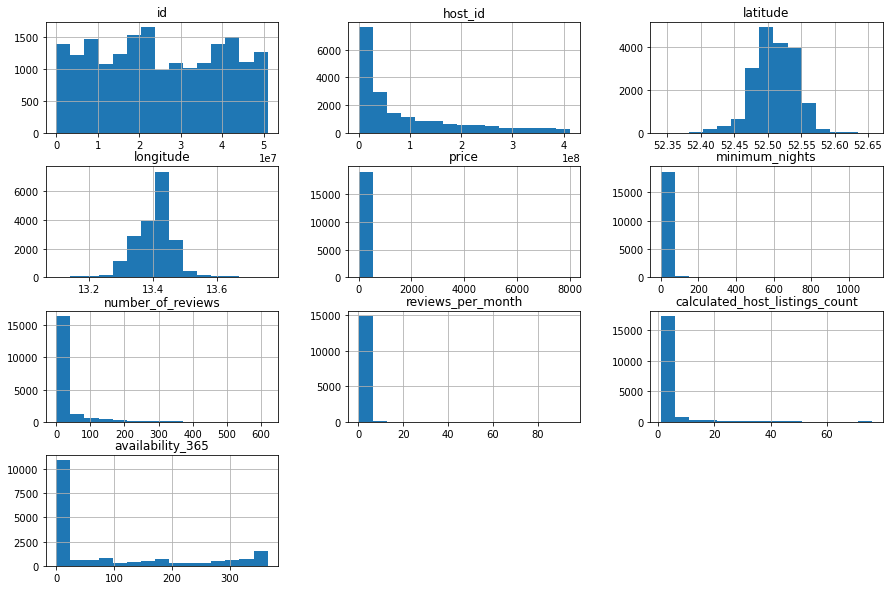

In [27]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=[15, 10]);

É possível notar a presença de outliers nas duas principais variáveis: price e minimum_nights

Os valores estão muito concentrados em uma única coluna à esquerda, com raríssimas representações do lado direito do gráfico

Para ter uma melhor noção da distribuição de preços e das noites mínimas de permanência, é importante remover pelo menos alguns desses outliers, que possivelmente são resultado de erro no preenchimento da base de dados

In [8]:
# descobrindo a partir de quais valores temos elementos classificados como outliers
q1_price = df['price'].quantile(.25)
q3_price = df['price'].quantile(.75)
IQR_price = q3_price - q1_price

q1_mn = df['minimum_nights'].quantile(.25)
q3_mn = df['minimum_nights'].quantile(.75)
IQR_mn = q3_mn - q1_mn

print('Valor do IQR para a variável price: {}'.format(IQR_price))
print('Valor do IQR para a variável minimum_price: {}'.format(IQR_mn))

Valor do IQR para a variável price: 46.0
Valor do IQR para a variável minimum_price: 3.0


In [9]:
# definindo os "limites" de preço                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

sup_mn = q3_mn + 1.5 * IQR_mn
inf_mn = q1_mn - 1.5 * IQR_mn

print('Variável price')
print('Limite superior: {}'.format(sup_price))
print('Limite inferior: {}'.format(inf_price))
print('')

print('Variável minimum_price')
print('Limite superior: {}'.format(sup_mn))
print('Limite inferior: {}'.format(inf_mn))
print('')

print('Para excluir os outliers, vou eliminar os valores abaixo do limite inferior e os valores acima no limite superior')


Variável price
Limite superior: 150.0
Limite inferior: -34.0

Variável minimum_price
Limite superior: 9.5
Limite inferior: -2.5

Para excluir os outliers, vou eliminar os valores abaixo do limite inferior e os valores acima no limite superior


In [10]:
print('Imóveis na base de dados: {}'.format(df.shape[0]))
print('')

print('Imóveis com preço da diária acima de 150: {} ({:.2f}% da base de dados)'.format(len(df[df['price'] > 150]), len(df[df['price'] > 150]) / df.shape [0] * 100))
print('Imóveis com preço da diária igual a zero: {} ({:.2f}% da base de dados)'.format(len(df[df['price'] <= 0]), len(df[df['price'] <= 0]) / df.shape[0] * 100))
print('')

print('Imóveis com mínimo de noites de permanência acima de 9,5: {} ({:.2f}% da base de dados)'.format(len(df[df['minimum_nights'] > 9.5]), len(df[df['minimum_nights'] > 9.5]) / df.shape[0] * 100))

Imóveis na base de dados: 19095

Imóveis com preço da diária acima de 150: 1273 (6.67% da base de dados)
Imóveis com preço da diária igual a zero: 7 (0.04% da base de dados)

Imóveis com mínimo de noites de permanência acima de 9,5: 2648 (13.87% da base de dados)


In [11]:
df_clean = df.copy()

In [12]:
# excluindo os outliers da variável price
df_clean.drop(df_clean[df_clean['price'] > 150].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean['price'] <= 0].index, axis = 0, inplace = True)

# excluindo os outliers da variável minimum_nights
df_clean.drop(df_clean[df['minimum_nights'] > 9.5].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df['minimum_nights'] > 9.5].index, axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


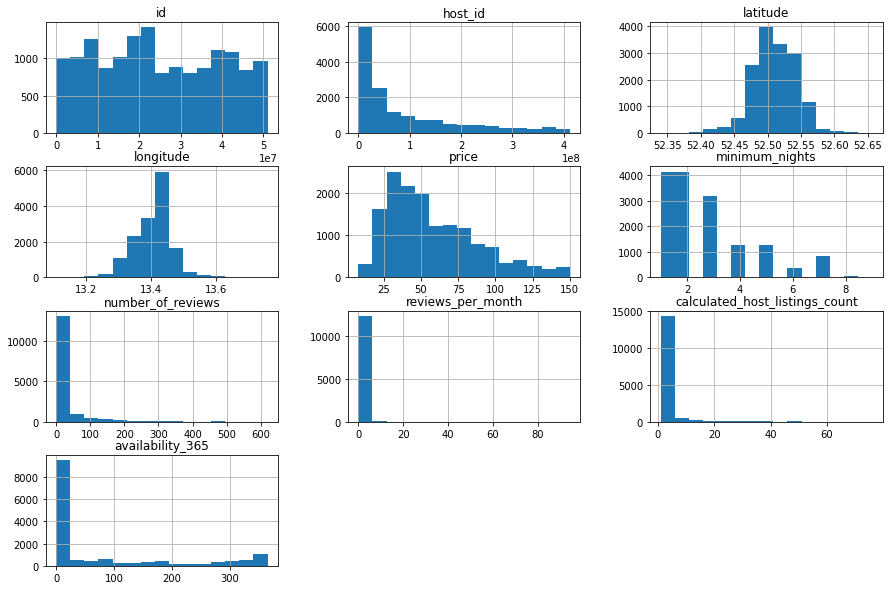

In [26]:
df_clean.hist(bins=15, figsize=[15, 10]);

Com a exclusão dos outliers é possível notar melhor a distribuição dos valores nos gráficos das variáveis price e minimum_nights

### **Q4. Qual a média dos preços de aluguel?**

In [14]:
# ver a média da coluna 'price'
média = df_clean['price'].mean()

print('Média de preço da diária dos imóveis: {:.2f}'.format(média))

Média de preço da diária dos imóveis: 58.22


### **Q5. Qual a correlação existente entre as variáveis**

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042102,0.075235,0.102885,0.102302,0.253998
minimum_nights,0.042102,1.000000,-0.086685,-0.133200,-0.133021,-0.137065
number_of_reviews,0.075235,-0.086685,1.000000,0.579120,0.059982,0.252921
reviews_per_month,0.102885,-0.133200,0.579120,1.000000,0.117651,0.272312
calculated_host_listings_count,0.102302,-0.133021,0.059982,0.117651,1.000000,0.341754
availability_365,0.253998,-0.137065,0.252921,0.272312,0.341754,1.000000


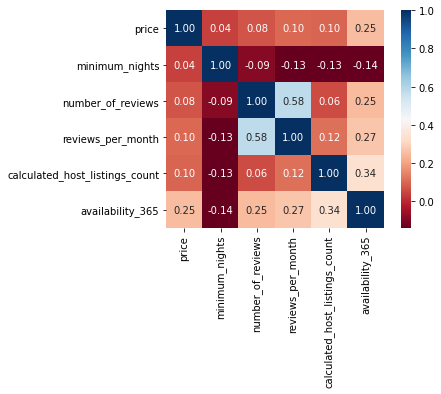

In [16]:
# plotar um heatmap a partir das correlações
import seaborn as sns
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

Não existem muitas correlações fortes no heat map acima.

A mais evidente é também a mais óbvia e que não traz muitas conclusões, entre as variáveis number_of_reviews e reviews_per_month.

No entanto, existem leves correlações na variável availability_365, especialmente com a variável calculated_host_listings_count.

Ou seja, existe uma tendência de que quanto mais propriedades uma pessoa oferece no Airbnb em Berlim, maior é o número de noites disponíveis desses imóveis.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    7638
Private room       7303
Shared room         216
Hotel room          102
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts() / df_clean.shape[0]

Entire home/apt    0.500557
Private room       0.478603
Shared room        0.014156
Hotel room         0.006685
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**



In [73]:
# ver preços por bairros, na média
print('A base de dados do Airbnb em Berlim registra {} bairros diferentes'.format(len(df_clean['neighbourhood'].unique())))
print('')
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = True) [:10]

A base de dados do Airbnb em Berlim registra 137 bairros diferentes



neighbourhood
Siemensstadt                28.750000
Neu-Hohenschönhausen Süd    29.000000
Hellersdorf-Ost             29.200000
Hellersdorf-Süd             30.250000
Allende-Viertel             33.000000
Niederschöneweide           33.600000
Friedrichsfelde Süd         34.787879
Forst Grunewald             35.000000
Lankwitz                    35.142857
Heerstraße Nord             35.857143
Name: price, dtype: float64

In [69]:
# verificando o número de entradas de cada bairro
df_clean['neighbourhood'].value_counts().loc['Heerstraße Nord']

7

Média de preço da diária nos bairros mais caros (entre parênteses, o número de imóveis disponíveis no bairro):
- Malchow, Wartenberg und Falkenberg           102.5 (2)
- Wilhelmstadt                                  89.4 (10)
- Rahnsdorf/Hessenwinkel                        88.5 (31)
- Regierungsviertel                             81.2 (104)
- Haselhorst                                    80.0 (3)
- Müggelheim                                    79.1 (11)
- Kurfürstendamm                                78.0 (102)
- Brunnenstr. Süd                               76.7 (475)
- Marzahn-Süd                                   76.4 (30)
- Schmöckwitz/Karolinenhof/Rauchfangswerder     74.7 (23)

Média de preço da diária nos bairros mais baratos (entre parênteses, o número de imóveis disponíveis no bairro):
- Siemensstadt                28.7 (4)
- Neu-Hohenschönhausen Süd    29.0 (4)
- Hellersdorf-Ost             29.2 (5)
- Hellersdorf-Süd             30.2 (4)
- Allende-Viertel             33.0 (3)
- Niederschöneweide           33.6 (20)
- Friedrichsfelde Süd         34.7 (33)
- Forst Grunewald             35.0 (1)
- Lankwitz                    35.1 (21)
- Heerstraße Nord             35.8 (7)


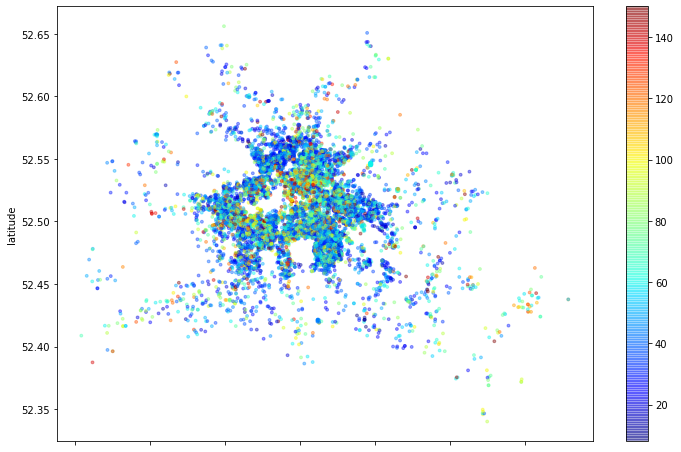

In [20]:
# plotar os imóveis pela latitude-longitude
import matplotlib.pyplot as plt
df_clean.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, c = df_clean['price'], s = 8,
              cmap = plt.get_cmap('jet'), figsize = (12, 8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [28]:
# ver a média da coluna `minimum_nights`
min = df_clean['minimum_nights'].mean()
print('Média de noites mínimas: {:.2f}'.format(min))

Média de noites mínimas: 2.77


## Conclusões


###Características do Airbnb em Berlim:

As diárias mais baratas custam pouco menos de 25 euros,mas em alguns imóveis o valor pode chegar a 150. A média é de 58,22.

A base de dados registra 137 bairros diferentes. Entre os dez com maiores médias de preço, a maioria tem poucos imóveis disponíveis. O mesmo vale para a lista com os dez com menor média.

Malchow, Wartenberg und Falkenberg é quem tem a maior média, mas registra apenas dois imóveis. Siemensstadt tem a menor média e tem quatro imóveis.

Como vimos também ao analisar as correlações da base de dados, existe uma tendência de que quanto mais propriedades uma pessoa oferece, maior é o número de noites disponíveis desses imóveis.

Quase todos os imóveis disponibilizados são apartamentos/casas inteiras ou quartos privados. Cada uma dessas categorias corresponte a aproximadamente metade do total.